In [131]:
import pandas as pd
from matplotlib import pyplot as plot
data = pd.read_csv("../datasets/Ruter_data.csv", delimiter=';')

In [132]:
data = data[['Kommune', 'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra', 'Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']]

In [133]:
def clean_hour(time) : return pd.Timestamp(str(int(time[0:2]) % 24) + time[2:])
def time_delta(actual, expected) : return int((clean_hour(actual) - clean_hour(expected)).total_seconds())
def delay(actual, expected) : return time_delta(actual, expected)

In [164]:
# We remove entries without an arrival time
data = data[data.Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra != ':']
cut_data = data.reset_index(drop=True)

actual_arrivals = cut_data['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
expected_arrivals = cut_data['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra']

In [165]:
cut_data.insert(3, 'Delay', [delay(actual_arrivals[i], expected_arrivals[i]) for i in range(len(data))], True)

In [171]:
lower, upper = cut_data.Delay.quantile([0.03, 0.97])

cut_data = cut_data[(cut_data.Delay > lower) & (cut_data.Delay < upper)]


In [179]:
cut_data = cut_data.groupby(by='Kommune').mean().sort_values(by='Delay')
cut_data.shape

(34, 1)

<AxesSubplot:xlabel='Kommune'>

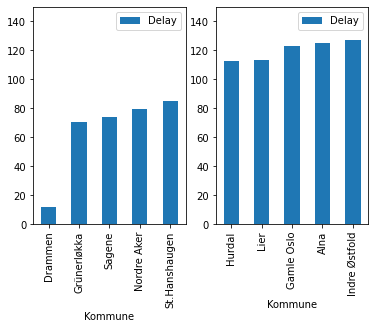

In [177]:
fix, axes = plot.subplots(1, 2)
axes[0].set_ylim(0, 150)
axes[1].set_ylim(0, 150)
cut_data.head(5).plot(ax=axes[0], kind='bar')
cut_data.tail(5).plot(ax=axes[1], kind='bar')

<AxesSubplot:xlabel='Kommune'>

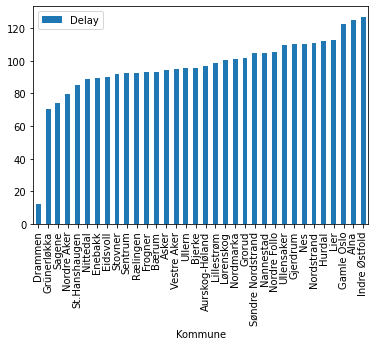

In [182]:
cut_data.plot(kind='bar')